In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint
import pandas as pd
import itertools

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

# load data & plot in notebook

In [2]:
file = '/vol01/active_projects/anthony/fhd_p4_eeg_pheno_v4_beta.csv'
arr_noshape = np.loadtxt(open(file, 'rb'),delimiter=",")

freqs = ['Low theta', 'High theta', 'Low alpha', 'High alpha',
        'Low beta', 'Mid beta', 'High beta']
chans = ['FP1-F3', 'FP2-F4', 'FP1-F7', 'FP2-F8', 'F7-F3',
         'F8-F4', 'F7-T7', 'F8-T8', 'F3-C3', 'F4-C4', 'FZ-CZ',
         'CZ-PZ', 'T7-C3', 'T8-C4', 'T7-P7', 'T8-P8', 'C3-P3', 'C4-P4',
         'P7-P3', 'P8-P4', 'P7-O1', 'P8-O2', 'P3-O1', 'P4-O2', 'PZ-O1',
         'PZ-O2', 'O1-O2', 'CZ-C3', 'CZ-C4', 'PZ-P3', 'PZ-P4', 'F7-C3',
         'F8-C4', 'FP1-FP2', 'F3-FZ', 'FZ-F4']

# set up ages on x axis at intervals of .2 from 12-31 
xaxis = []
count = 11.8
for i in range(96):
    count += float(.2)
    xaxis.append(round(count,2))
    
xaxis_arr = np.array(xaxis)


arr = arr_noshape.reshape(7,36,6,96)

#### build a data frame of age by channel for each of the 7 frequencies

In [3]:
def build_freq_df(arr, frequency_idx, channel_names, xaxis_ages):
    
    # extract 1 frequency from array & store in list
    frequency_list = [arr[frequency_idx][x][2] for x in range(36)]
    
    # unwrap list from array
    frequency_array = np.vstack(frequency_list)
    
    # create new column names based on channel & age
    old_cols = [i for i in range(36)]
    new_cols = dict(zip(old_cols, channel_names))

    old_idx = [i for i in range(96)]
    new_idx = dict(zip(old_idx, xaxis_ages))
    
    # map these columns to data frame
    df = pd.DataFrame(frequency_array).T
    df1 = df.rename(columns=new_cols)
    df2 = df1.T.rename(columns=new_idx).T
    return df2

In [4]:
low_theta_df = build_freq_df(arr,0, chans, xaxis)
high_theta_df = build_freq_df(arr,1, chans, xaxis)

low_alpha_df = build_freq_df(arr,2, chans, xaxis)
high_alpha_df = build_freq_df(arr,3, chans, xaxis)
low_beta_df = build_freq_df(arr,4, chans, xaxis)
mid_beta_df = build_freq_df(arr,5, chans, xaxis)
high_beta_df = build_freq_df(arr,6, chans, xaxis)

In [7]:
low_beta_df.head()

,FP1-F3,FP2-F4,FP1-F7,FP2-F8,F7-F3,F8-F4,F7-T7,F8-T8,F3-C3,F4-C4,FZ-CZ,CZ-PZ,T7-C3,T8-C4,T7-P7,T8-P8,C3-P3,C4-P4,P7-P3,P8-P4,P7-O1,P8-O2,P3-O1,P4-O2,PZ-O1,PZ-O2,O1-O2,CZ-C3,CZ-C4,PZ-P3,PZ-P4,F7-C3,F8-C4,FP1-FP2,F3-FZ,FZ-F4
12.0,0.026222,0.032023,0.039117,0.030639,0.033602,0.034123,0.046144,0.032632,0.033283,0.042640,0.015575,0.015795,0.017271,0.020866,0.017526,0.021952,0.032056,0.025453,0.027048,0.028213,0.035500,0.027771,0.028968,0.039310,0.016886,0.017917,0.019495,0.024586,0.020712,0.022951,0.030443,0.012654,0.014266,0.015038,0.019573,0.017876
12.2,0.027952,0.033610,0.040545,0.032813,0.035875,0.036464,0.048319,0.034611,0.034979,0.044221,0.017318,0.017574,0.019209,0.023086,0.019396,0.023706,0.033535,0.027600,0.029187,0.030418,0.037903,0.029782,0.030823,0.040814,0.019352,0.020266,0.021854,0.027131,0.022955,0.025084,0.032456,0.014544,0.016067,0.016829,0.021571,0.019516
12.4,0.029253,0.034806,0.041649,0.033521,0.036695,0.037443,0.049270,0.035452,0.035703,0.044904,0.018251,0.018636,0.020353,0.024703,0.020636,0.024868,0.034445,0.028356,0.029902,0.031257,0.039121,0.030691,0.031744,0.041447,0.020954,0.021830,0.023339,0.028982,0.024518,0.026619,0.033900,0.015963,0.017417,0.018194,0.023325,0.020796
12.6,0.030483,0.036047,0.042655,0.033648,0.036949,0.037930,0.049925,0.035830,0.036136,0.045211,0.018854,0.019353,0.021277,0.026174,0.021574,0.025851,0.035116,0.027810,0.029369,0.030930,0.039338,0.030496,0.031796,0.041224,0.022236,0.023107,0.024651,0.030769,0.025834,0.028060,0.035228,0.016728,0.018146,0.019076,0.024721,0.021463
12.8,0.032051,0.037721,0.043996,0.033974,0.037328,0.038511,0.050904,0.036357,0.036752,0.045535,0.019936,0.020485,0.022572,0.028200,0.022948,0.027377,0.036206,0.027351,0.028818,0.030485,0.039619,0.030248,0.031848,0.040840,0.023300,0.024114,0.025678,0.032387,0.026876,0.029377,0.036362,0.017263,0.018584,0.019639,0.025974,0.021849


#### get max/min for ONLY 1 CHANNEL IN A FREQUENCY RANGE

In [6]:
def get_max_min_by_channel(df, channel):
    """this is to get max/min for ONLY 1 CHANNEL"""


    # get max age & round to 1 decimal place so it can be used to query index 
    max_age = round(float(df[channel].argmax()),1)
    min_age = round(float(df[channel].argmin()),1)

    # find value at max age and & partricular channel -- change list to string 
    max_df = df.ix[[max_age]]
    max_age_value = str(max_df[channel].tolist()).replace('[', '').replace(']', '').replace("'", "")

    # find value at max age and & partricular channel -- change list to string 
    min_df = df.ix[[min_age]]
    min_age_value = str(min_df[channel].tolist()).replace('[', '').replace(']', '').replace("'", "")


    max_min_ages_dict = {}
    max_min_ages_dict.setdefault(channel, {})['max_age']= max_age
    max_min_ages_dict.setdefault(channel, {})['max_value']= max_age_value

    max_min_ages_dict.setdefault(channel, {})['min_age']= min_age
    max_min_ages_dict.setdefault(channel, {})['min_value']= min_age_value
    
    
    return max_min_ages_dict

#### get max/min for ALL CHANNELS IN A FREQUENCY RANGE

In [7]:
def get_max_min_all_channels(df, chans):
    """this is to get max/min for ALL CHANNELS"""
    
    # low theta dict for max/min values 
    updated_dict = {}
    for x in range(36):
        dic = get_max_min_by_channel(df,chans[x])
        updated_dict.update(dic)


    df = pd.DataFrame.from_dict(updated_dict, orient='index').reset_index()
    col_names = df.columns.tolist()
    col_names_no_idx = [i for i in col_names if 'index' not in i]

    df[col_names_no_idx] = df[col_names_no_idx].astype(float)
    return df

In [8]:
low_theta_maxmin_df = get_max_min_all_channels(low_theta_df, chans)
high_theta_maxmin_df = get_max_min_all_channels(high_theta_df, chans)

low_alpha_maxmin_df = get_max_min_all_channels(low_alpha_df,chans)
high_alpha_maxmin_df = get_max_min_all_channels(high_alpha_df,chans)
low_beta_maxmin_df = get_max_min_all_channels(low_beta_df,chans)
mid_beta_maxmin_df = get_max_min_all_channels(mid_beta_df,chans)
high_beta_maxmin_df= get_max_min_all_channels(high_beta_df,chans)

/usr/local/anaconda3/envs/dbI/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [9]:
low_theta_maxmin_df.head()

,index,min_value,min_age,max_value,max_age
0,C3-P3,-0.007727,21.0,0.039290,16.2
1,C4-P4,-0.008550,21.0,0.037412,16.0
2,CZ-C3,-0.010748,21.4,0.046781,14.0
3,CZ-C4,-0.013541,18.6,0.031983,14.6
4,CZ-PZ,-0.004935,21.4,0.042375,14.2


### create new data frames that contain only max value or only min values 

In [10]:
# max values data frames 
lt_max = low_theta_maxmin_df[['index','max_age', 'max_value']]
ht_max = high_theta_maxmin_df[['index','max_age', 'max_value']]

la_max=  low_alpha_maxmin_df[['index','max_age', 'max_value']]
ha_max = high_alpha_maxmin_df[['index','max_age', 'max_value']]

lb_max = low_beta_maxmin_df[['index','max_age', 'max_value']]
mb_max = mid_beta_maxmin_df[['index','max_age', 'max_value']]
hb_max = high_beta_maxmin_df[['index','max_age', 'max_value']]

# min values data frames
lt_min = low_theta_maxmin_df[['index','min_age', 'min_value']]
ht_min = high_theta_maxmin_df[['index','min_age', 'min_value']]

la_min=  low_alpha_maxmin_df[['index','min_age', 'min_value']]
ha_min = high_alpha_maxmin_df[['index','min_age', 'min_value']]

lb_min = low_beta_maxmin_df[['index','min_age', 'min_value']]
mb_min = mid_beta_maxmin_df[['index','min_age', 'min_value']]
hb_min = high_beta_maxmin_df[['index','min_age', 'min_value']]

#### create subplots of max/min of each frequency range in 1 scatterplot

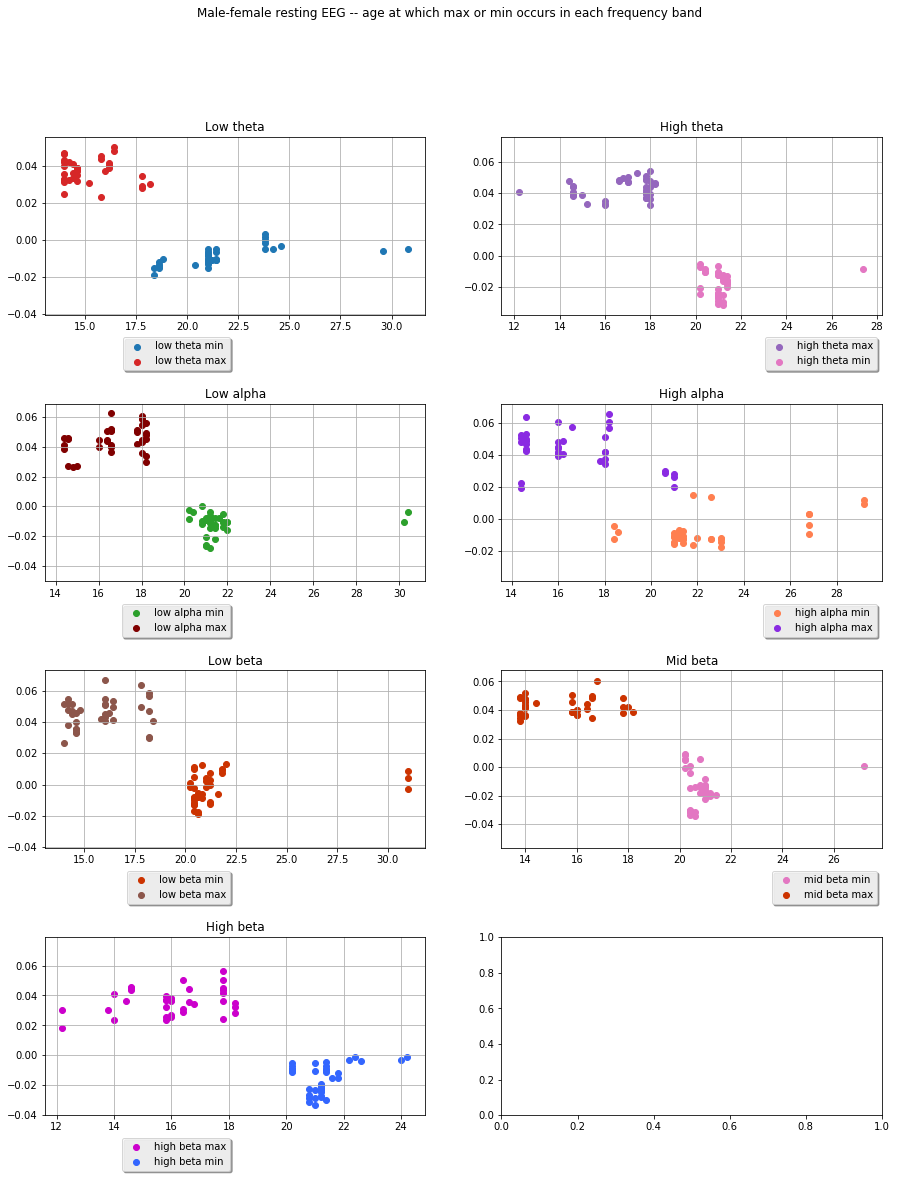

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,18)) #figsize=(18,15)
fig.subplots_adjust(hspace=0.5)
ax = axes.flatten()

ax[0].scatter(lt_min['min_age'], lt_min['min_value'], color='#1f77b4', label='low theta min')
ax[0].scatter(lt_max['max_age'], lt_max['max_value'], color='#d62728', label='low theta max')
ax[0].set_title('Low theta')
ax[0].legend(loc=0, bbox_to_anchor=(0.5, -0.099), fancybox=True, shadow=True)
ax[0].grid('on')
ax[0].axis('tight')

ax[1].scatter(ht_max['max_age'], ht_max['max_value'], color='#9467bd', label='high theta max')
ax[1].scatter(ht_min['min_age'], ht_min['min_value'], color='#e377c2', label='high theta min')
ax[1].set_title('High theta')
ax[1].legend(loc=0, bbox_to_anchor=(1,-0.099), fancybox=True, shadow=True)
ax[1].grid('on')
ax[1].axis('tight')


ax[2].scatter(la_min['min_age'], la_min['min_value'], color='#2ca02c', label='low alpha min')
ax[2].scatter(la_max['max_age'], la_max['max_value'], color='#800000', label='low alpha max')
ax[2].set_title('Low alpha')
ax[2].legend(loc=0, bbox_to_anchor=(0.5,-0.099), fancybox=True, shadow=True)
ax[2].grid('on')
ax[2].axis('tight')


ax[3].scatter(ha_min['min_age'], ha_min['min_value'], color='#FF7F50', label='high alpha min')
ax[3].scatter(ha_max['max_age'], ha_max['max_value'], color='#8A2BE2', label='high alpha max')
ax[3].set_title('High alpha')
ax[3].legend(loc=0, bbox_to_anchor=(1,-0.099), fancybox=True, shadow=True)
ax[3].grid('on')
ax[3].axis('tight')


ax[4].scatter(lb_min['min_age'], lb_min['min_value'], color='#cc3300', label='low beta min')
ax[4].scatter(lb_max['max_age'], lb_max['max_value'], color='#8c564b', label='low beta max')
ax[4].set_title('Low beta')
ax[4].legend(loc=0, bbox_to_anchor=(0.5,-0.099), fancybox=True, shadow=True)
ax[4].grid('on')
ax[4].axis('tight')



ax[5].scatter(mb_min['min_age'], mb_min['min_value'], color='#e377c2', label='mid beta min')
ax[5].scatter(mb_max['max_age'], mb_max['max_value'], color='#cc3300', label='mid beta max')
ax[5].legend(loc=0, bbox_to_anchor=(1,-0.099), fancybox=True, shadow=True)
ax[5].set_title('Mid beta')
ax[5].grid('on')
ax[5].axis('tight')



ax[6].scatter(hb_max['max_age'], hb_max['max_value'], color='#cc00cc', label='high beta max')
ax[6].scatter(hb_min['min_age'], hb_min['min_value'], color='#3366ff', label='high beta min')
ax[6].set_title('High beta')
ax[6].legend(loc=0, bbox_to_anchor=(0.5,-0.099), fancybox=True, shadow=True)
ax[6].grid('on')
ax[6].axis('tight')

fig.suptitle('Male-female resting EEG -- age at which max or min occurs in each frequency band')

fig.savefig('scatterplots.pdf')

#### create subplots of each frequency band's minimum & maximum value in separate scatterplots

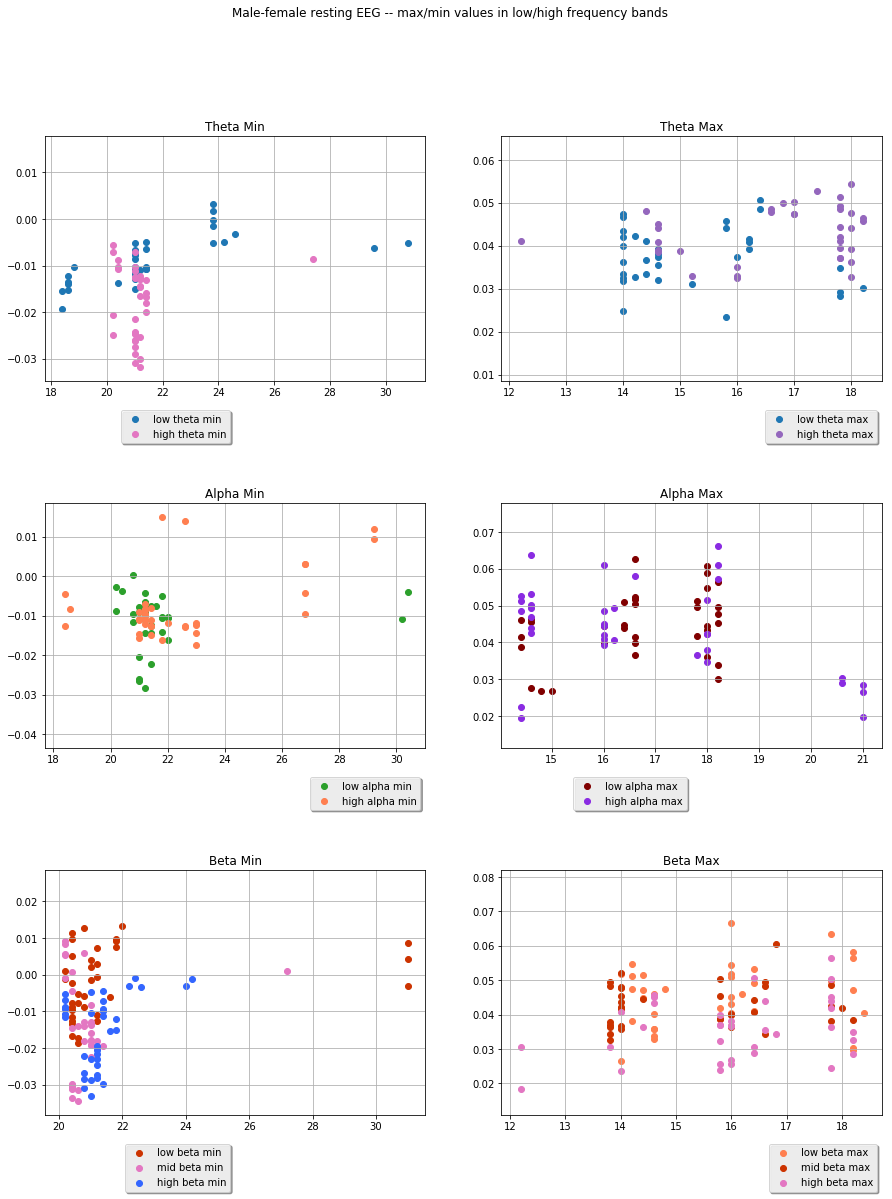

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,18)) #figsize=(18,15)
fig.subplots_adjust(hspace=0.5)
ax = axes.flatten()

ax[0].scatter(lt_min['min_age'], lt_min['min_value'], color='#1f77b4', label='low theta min')
ax[0].scatter(ht_min['min_age'], ht_min['min_value'], color='#e377c2', label='high theta min')
ax[0].set_title('Theta Min')
ax[0].grid('on')
ax[0].legend(loc=0, bbox_to_anchor=(0.5, -0.099), fancybox=True, shadow=True)

ax[1].scatter(lt_max['max_age'], lt_max['max_value'], color='#1f77b4', label='low theta max')
ax[1].scatter(ht_max['max_age'], ht_max['max_value'], color='#9467bd', label='high theta max')
ax[1].set_title('Theta Max')
ax[1].legend(loc=0, bbox_to_anchor=(1,-0.099), fancybox=True, shadow=True)
ax[1].grid('on')


ax[2].scatter(la_min['min_age'], la_min['min_value'], color='#2ca02c', label='low alpha min')
ax[2].scatter(ha_min['min_age'], ha_min['min_value'], color='#FF7F50', label='high alpha min')
ax[2].set_title('Alpha Min')
ax[2].legend(loc=0, bbox_to_anchor=(1,-0.099), fancybox=True, shadow=True)
ax[2].grid('on')


ax[3].scatter(la_max['max_age'], la_max['max_value'], color='#800000', label='low alpha max')
ax[3].scatter(ha_max['max_age'], ha_max['max_value'], color='#8A2BE2', label='high alpha max')
ax[3].set_title('Alpha Max')
ax[3].grid('on')
ax[3].legend(loc=0, bbox_to_anchor=(0.5, -0.099), fancybox=True, shadow=True)

ax[4].scatter(lb_min['min_age'], lb_min['min_value'], color='#cc3300', label='low beta min')
ax[4].scatter(mb_min['min_age'], mb_min['min_value'], color='#e377c2', label='mid beta min')
ax[4].scatter(hb_min['min_age'], hb_min['min_value'], color='#3366ff', label='high beta min')
ax[4].set_title('Beta Min')
ax[4].grid('on')
ax[4].legend(loc=0, bbox_to_anchor=(0.5, -0.099), fancybox=True, shadow=True)



ax[5].scatter(lb_max['max_age'], lb_max['max_value'], color='#FF7F50', label='low beta max')
ax[5].scatter(mb_max['max_age'], mb_max['max_value'], color='#cc3300', label='mid beta max')
ax[5].scatter(hb_max['max_age'], hb_max['max_value'], color='#e377c2', label='high beta max')
ax[5].set_title('Beta Max')
ax[5].legend(loc=0, bbox_to_anchor=(1,-0.099), fancybox=True, shadow=True)
ax[5].grid('on')
fig.suptitle('Male-female resting EEG -- max/min values in low/high frequency bands')

fig.savefig('scatter.pdf', bbox_inches='tight')

#### too much noise

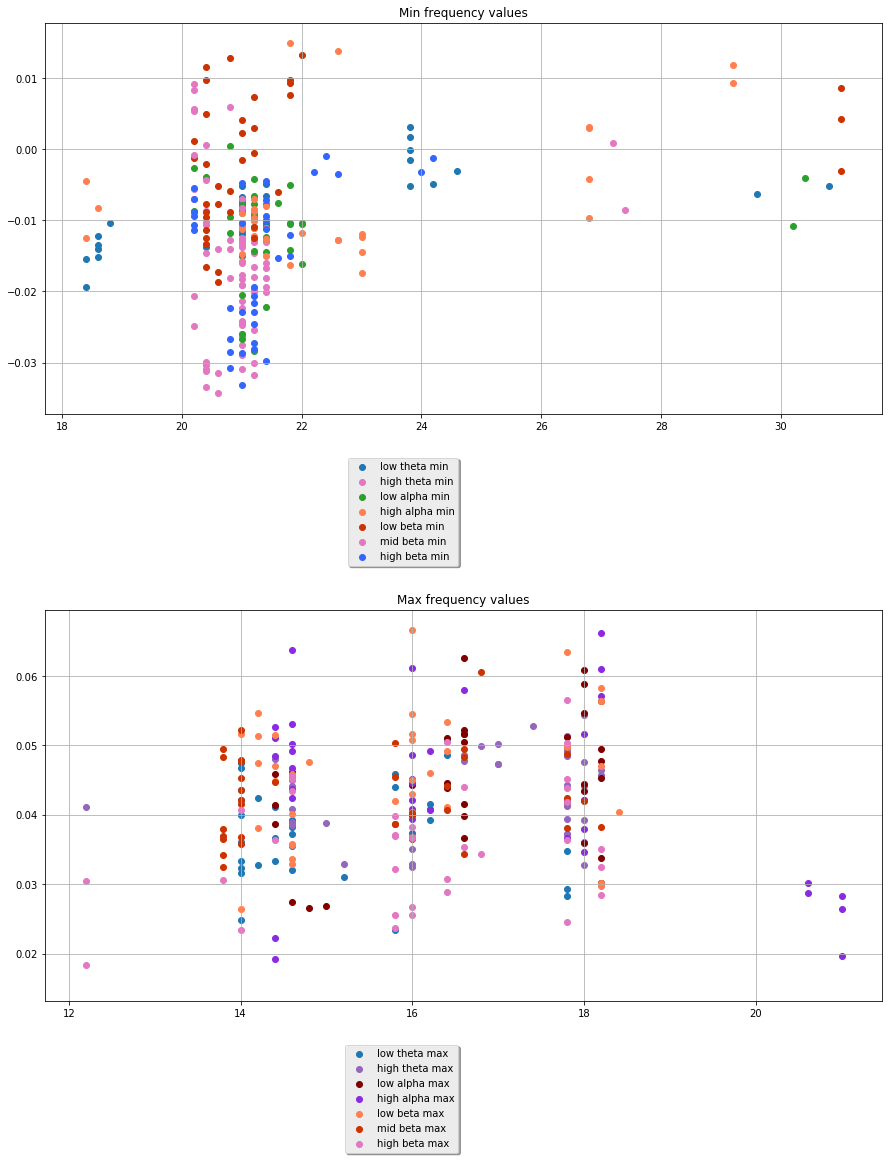

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,18)) #figsize=(18,15)
fig.subplots_adjust(hspace=0.5)
ax = axes.flatten()



ax[0].scatter(lt_min['min_age'], lt_min['min_value'], color='#1f77b4', label='low theta min')
ax[0].scatter(ht_min['min_age'], ht_min['min_value'], color='#e377c2', label='high theta min')
ax[0].scatter(la_min['min_age'], la_min['min_value'], color='#2ca02c', label='low alpha min')
ax[0].scatter(ha_min['min_age'], ha_min['min_value'], color='#FF7F50', label='high alpha min')
ax[0].scatter(lb_min['min_age'], lb_min['min_value'], color='#cc3300', label='low beta min')
ax[0].scatter(mb_min['min_age'], mb_min['min_value'], color='#e377c2', label='mid beta min')
ax[0].scatter(hb_min['min_age'], hb_min['min_value'], color='#3366ff', label='high beta min')
ax[0].grid('on')
ax[0].set_title('Min frequency values')
ax[0].legend(loc=0, bbox_to_anchor=(0.5, -0.099), fancybox=True, shadow=True)


ax[1].scatter(lt_max['max_age'], lt_max['max_value'], color='#1f77b4', label='low theta max')
ax[1].scatter(ht_max['max_age'], ht_max['max_value'], color='#9467bd', label='high theta max')
ax[1].scatter(la_max['max_age'], la_max['max_value'], color='#800000', label='low alpha max')
ax[1].scatter(ha_max['max_age'], ha_max['max_value'], color='#8A2BE2', label='high alpha max')
ax[1].scatter(lb_max['max_age'], lb_max['max_value'], color='#FF7F50', label='low beta max')
ax[1].scatter(mb_max['max_age'], mb_max['max_value'], color='#cc3300', label='mid beta max')
ax[1].scatter(hb_max['max_age'], hb_max['max_value'], color='#e377c2', label='high beta max')
ax[1].grid('on')
ax[1].set_title('Max frequency values')
ax[1].legend(loc=0, bbox_to_anchor=(0.5, -0.099), fancybox=True, shadow=True)

#fig.savefig('maxmin.pdf', bbox_inches='tight')

# ANYTHING ABOVE HERE... LOOK DONT TOUCH

In [14]:
# max values data frames 
lt_max = low_theta_maxmin_df[['index','max_age', 'max_value']]
ht_max = high_theta_maxmin_df[['index','max_age', 'max_value']]

la_max=  low_alpha_maxmin_df[['index','max_age', 'max_value']]
ha_max = high_alpha_maxmin_df[['index','max_age', 'max_value']]

lb_max = low_beta_maxmin_df[['index','max_age', 'max_value']]
mb_max = mid_beta_maxmin_df[['index','max_age', 'max_value']]
hb_max = high_beta_maxmin_df[['index','max_age', 'max_value']]

# min values data frames
lt_min = low_theta_maxmin_df[['index','min_age', 'min_value']]
ht_min = high_theta_maxmin_df[['index','min_age', 'min_value']]

la_min=  low_alpha_maxmin_df[['index','min_age', 'min_value']]
ha_min = high_alpha_maxmin_df[['index','min_age', 'min_value']]

lb_min = low_beta_maxmin_df[['index','min_age', 'min_value']]
mb_min = mid_beta_maxmin_df[['index','min_age', 'min_value']]
hb_min = high_beta_maxmin_df[['index','min_age', 'min_value']]

In [15]:
def get_max_min_row(df, new_col_name, maxx=False, minn=False):
    
    if maxx:
        df1 =  df.sort_values(by='max_value', ascending=0).iloc[0:5]
        df1[new_col_name] = new_col_name
        return df1
    if minn:
        return df.sort_values(by='min_value', ascending=1).iloc[0:5]

In [16]:
# max 5
lt_max5 = get_max_min_row(lt_max, 'low_theta_max', maxx=True)
ht_max5 = get_max_min_row(ht_max, 'high_theta_max', maxx=True)

la_max5 = get_max_min_row(la_max, 'low_alpha_max', maxx=True)
ha_max5 = get_max_min_row(ha_max, 'high_alpha_max', maxx=True)

lb_max5 = get_max_min_row(lb_max, 'low_beta_max', maxx=True)
mb_max5 = get_max_min_row(mb_max, 'mid_beta_max', maxx=True)
hb_max5 = get_max_min_row(hb_max, 'high_beta_max', maxx=True)

# min 5
lt_min5 = get_max_min_row(lt_min, 'low_theta_min', minn=True)
ht_min5 = get_max_min_row(ht_min, 'high_theta_min', minn=True)

la_min5 = get_max_min_row(la_min, 'low_alpha_min', minn=True)
ha_min5 = get_max_min_row(ha_min, 'high_alpha_min', minn=True)

lb_min5 = get_max_min_row(lb_min, 'low_beta_min', minn=True)
mb_min5 = get_max_min_row(mb_min, 'mid_beta_min', minn=True)
hb_min5 = get_max_min_row(hb_min, 'high_beta_min', minn=True)

In [17]:
df = lt_max5.append(ht_max5).append(la_max5).append(ha_max5).append(lb_max5).append(mb_max5).append(hb_max5)

In [18]:
len(list(set(df['index'].tolist())))

24

In [19]:
df1 = lt_max5.append(ht_max5)

In [20]:
df1.sort_values('index', ascending=0)

,high_theta_max,index,low_theta_max,max_age,max_value
34,NaN,T8-C4,low_theta_max,15.8,0.045843
31,high_theta_max,PZ-P4,NaN,18.0,0.054366
27,NaN,P8-P4,low_theta_max,16.4,0.048605
24,NaN,P7-O1,low_theta_max,16.4,0.050668
21,NaN,O1-O2,low_theta_max,14.0,0.047474
20,high_theta_max,FZ-F4,NaN,17.8,0.051333
7,high_theta_max,F4-C4,NaN,17.4,0.052799
5,high_theta_max,F3-C3,NaN,17.0,0.050204
4,high_theta_max,CZ-PZ,NaN,16.8,0.049894
2,NaN,CZ-C3,low_theta_max,14.0,0.046781
